<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_Spring_2025/blob/master/05_06_PyDMD_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PyDMD**
This notebook is based on the tutorial of PyDMD.
(https://pydmd.github.io/PyDMD/tutorial2advdmd.html)

In [2]:
try:
    # Try importing the pydmd module
    import pydmd
    print("PyDMD is already installed.")
except ImportError:
    # If the import fails, install the pydmd package
    print("PyDMD is not installed. Installing now...")
    !pip install pydmd
    # Import pydmd after installation
    import pydmd
    print("PyDMD has been successfully installed.")


PyDMD is already installed.


In [3]:
%matplotlib inline
import numpy as np
import scipy
import scipy.integrate

from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
from pydmd import DMD
from pydmd.plotter import plot_modes_2D

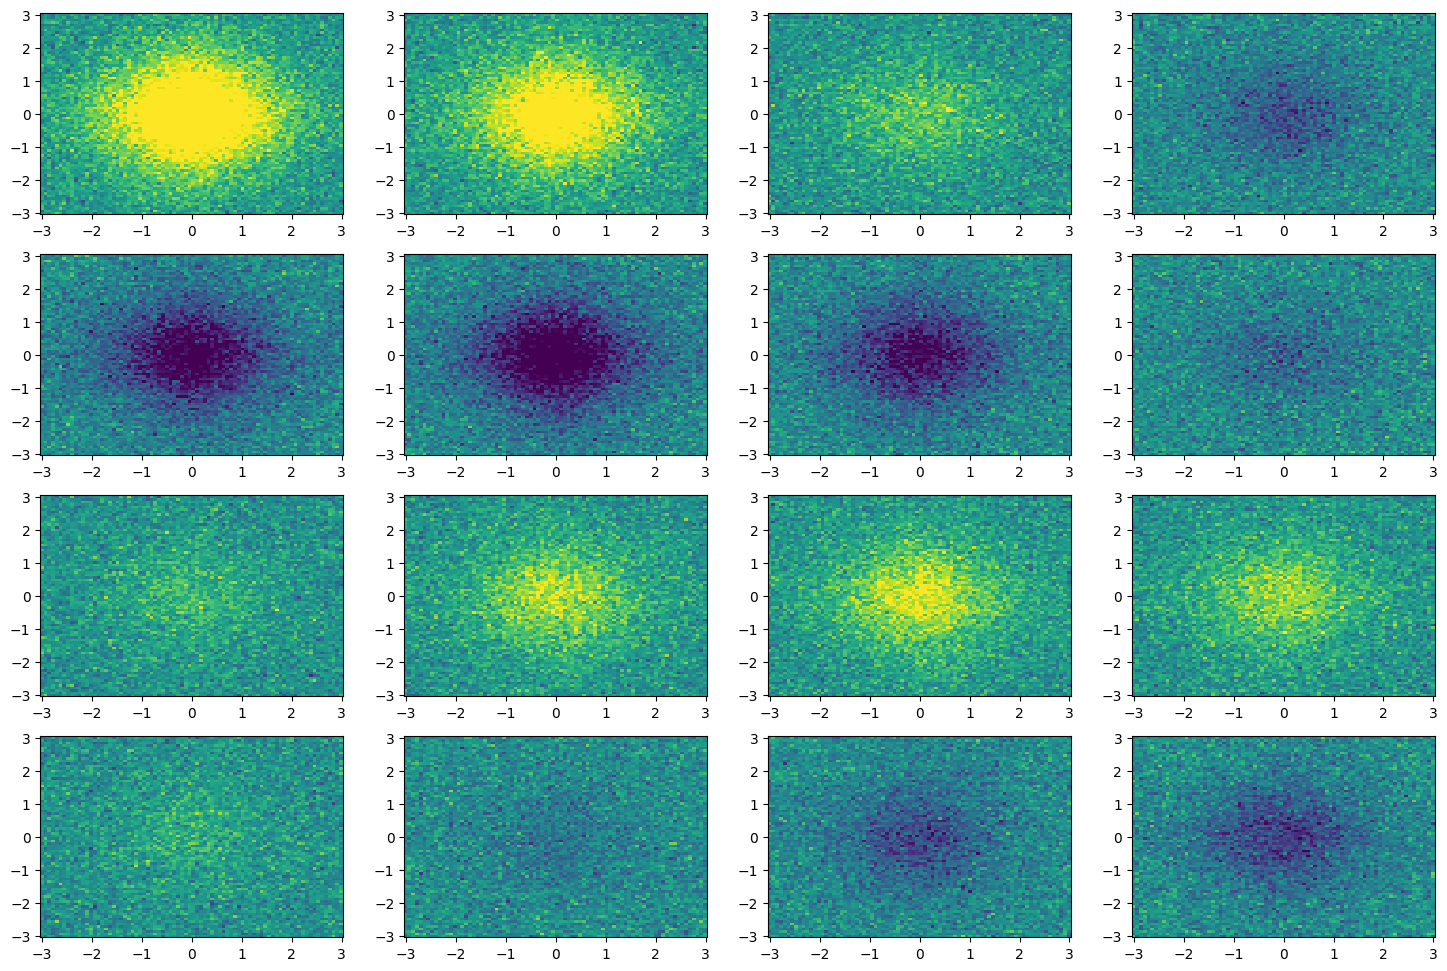

In [12]:
x = np.linspace(-3, 3, 80)
y = np.linspace(-3, 3, 80)
xgrid, ygrid = np.meshgrid(x, y)

time = np.linspace(0, 6, 16)

data = [2 / np.cosh(xgrid) / np.cosh(ygrid) * (1.2j**-t) for t in time]
noise = [np.random.normal(0.0, 0.2, size=xgrid.shape) for t in time]

snapshots = [d + n for d, n in zip(data, noise)]

fig = plt.figure(figsize=(18, 12))
for id_subplot, snapshot in enumerate(snapshots, start=1):
    plt.subplot(4, 4, id_subplot)
    plt.pcolor(xgrid, ygrid, snapshot.real, vmin=-1, vmax=1)

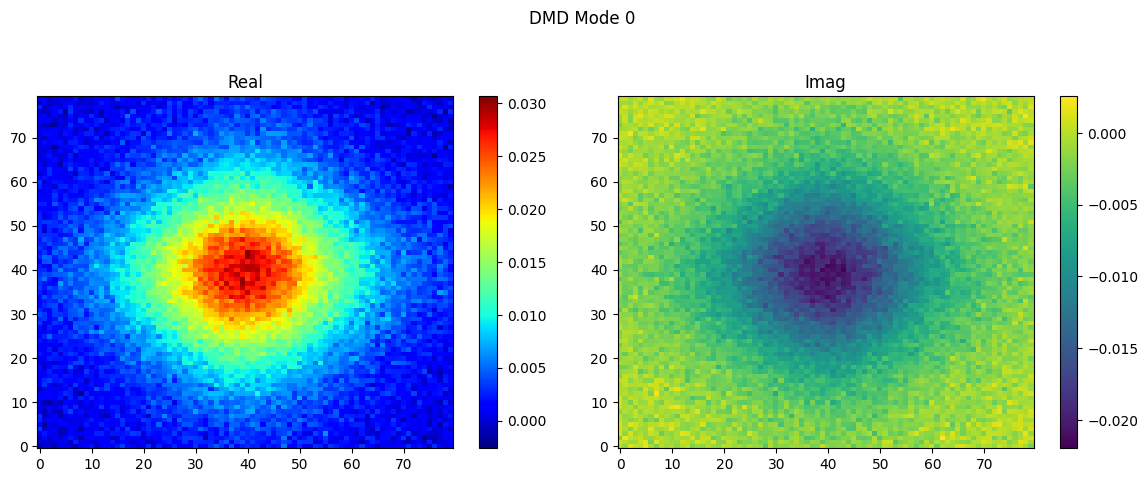

In [13]:
dmd = DMD(svd_rank=1, tlsq_rank=2, exact=True, opt=True)
dmd.fit(snapshots)
plot_modes_2D(dmd, figsize=(12, 5))

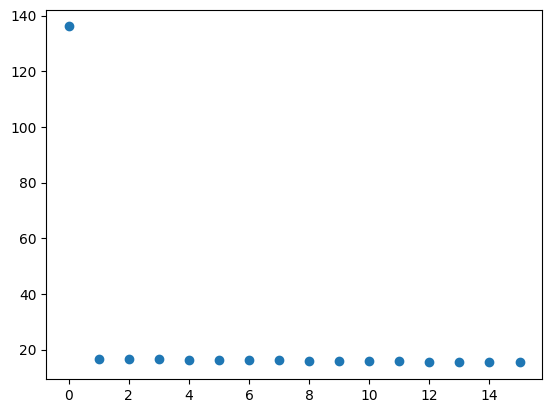

In [14]:
fig = plt.plot(scipy.linalg.svdvals(np.array([snapshot.flatten() for snapshot in snapshots]).T),"o",)

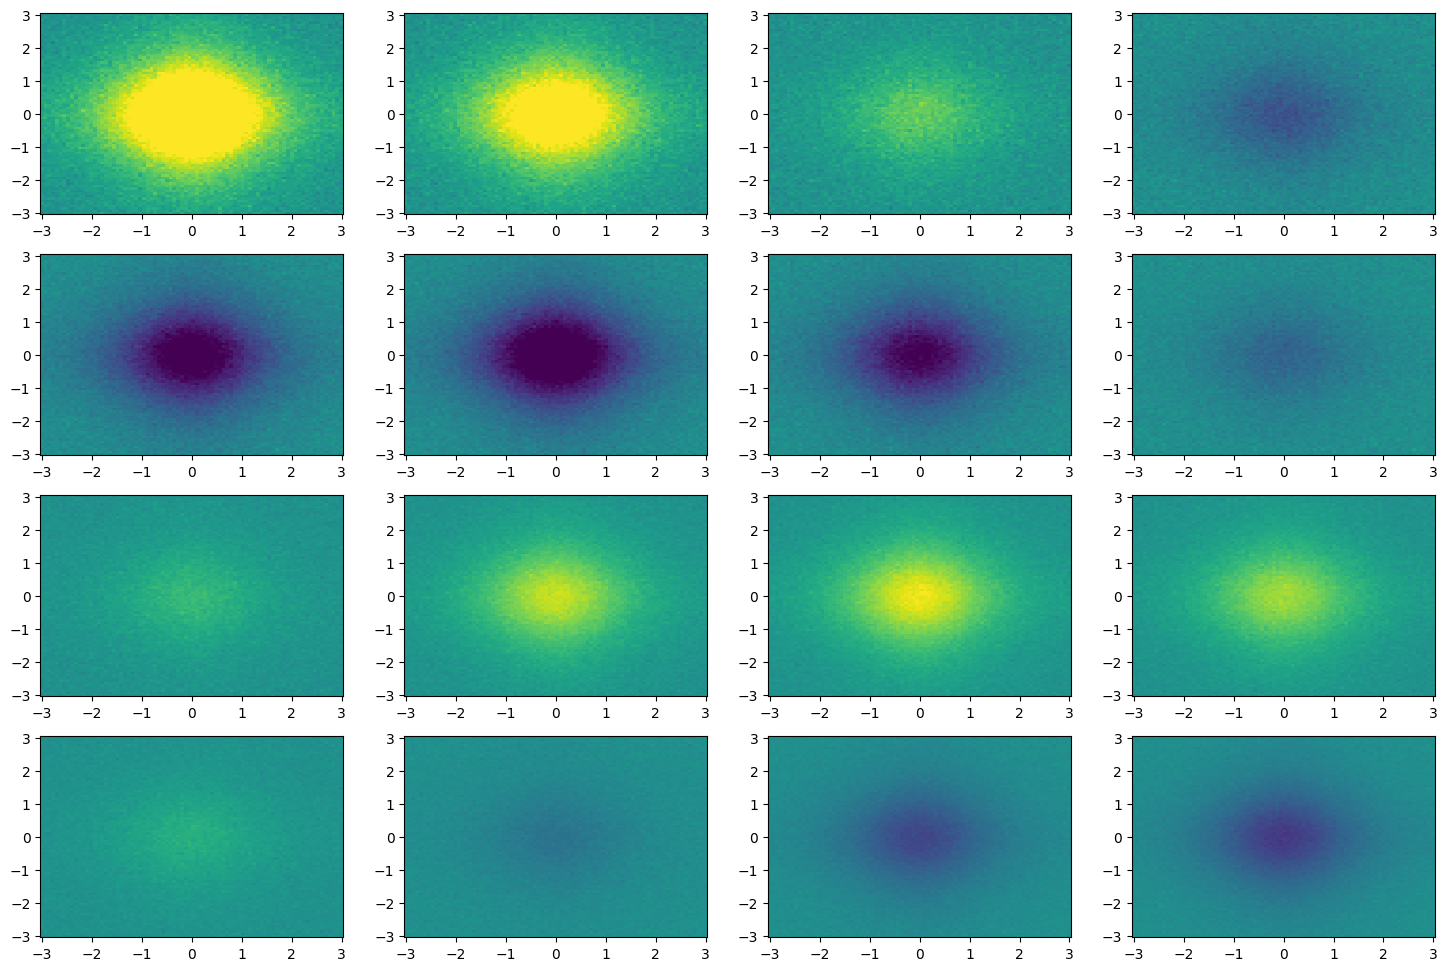

In [15]:
fig = plt.figure(figsize=(18, 12))
for id_subplot, snapshot in enumerate(dmd.reconstructed_data.T, start=1):
    plt.subplot(4, 4, id_subplot)
    plt.pcolor(xgrid, ygrid, snapshot.reshape(xgrid.shape).real, vmin=-1, vmax=1)

In [16]:
print("Shape before manipulation: {}".format(dmd.reconstructed_data.shape))
dmd.dmd_time["dt"] *= 0.25
dmd.dmd_time["tend"] *= 3
print("Shape after manipulation: {}".format(dmd.reconstructed_data.shape))

Shape before manipulation: (6400, 16)
Shape after manipulation: (6400, 181)


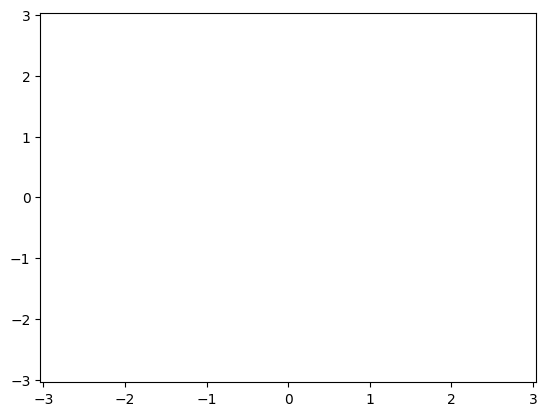

In [17]:
fig = plt.figure()

dmd_states = [state.reshape(xgrid.shape) for state in dmd.reconstructed_data.T]

frames = [
    [plt.pcolor(xgrid, ygrid, state.real, vmin=-1, vmax=1)]
    for state in dmd_states
]

ani = animation.ArtistAnimation(
    fig, frames, interval=70, blit=False, repeat=False
)

HTML(ani.to_html5_video())

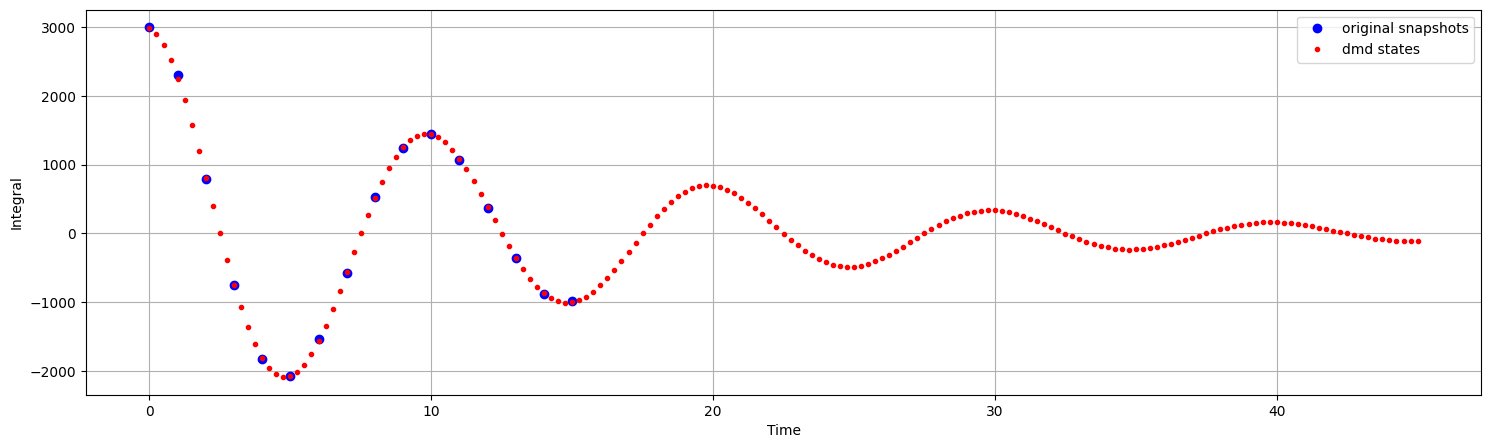

In [18]:
compute_integral = scipy.integrate.trapezoid

original_int = [
    compute_integral(compute_integral(snapshot)).real for snapshot in snapshots
]
dmd_int = [
    compute_integral(compute_integral(state)).real for state in dmd_states
]

figure = plt.figure(figsize=(18, 5))
plt.plot(dmd.original_timesteps, original_int, "bo", label="original snapshots")
plt.plot(dmd.dmd_timesteps, dmd_int, "r.", label="dmd states")
plt.ylabel("Integral")
plt.xlabel("Time")
plt.grid()
leg = plt.legend()